# Proyecto de Segmentación y Clasificación de úlceras corneales

# Avance 2. Ingeniería de Características

**INTEGRANTES**:

*   Erick Alexei Cambray Servin 	 A01794243
*   Walter André Hauri Rosales 	   A01794237
*   Zmaltzin Paola Godinez Juárez  A01794538

In [11]:
import os
import sys

import matplotlib.pyplot as plt
import skimage as sk
from matplotlib import gridspec
from skimage import io

import cv2

Pasos para poder hacer una ingeniería sobre las imagenes es primero lograr pasar de la imagen original a una que pueda ser pasada por un algoritmo de cluster para lograr su segmentación. Por lo que en esta parte del proyecto nos centraremos en lograr el código que sea capaz de hacer esta preparación de las imagenes originales o la raw data

Para lograr una extracción de las carecterísticas de interés hemos creado una clase en el archivo `preprocessing_data.py`

In [ ]:
raw_image_data_path = os.path.join(os.getcwd(), '../data/rawImages')
corneaLabels_path = os.path.join(os.getcwd(), '../data/corneaLabels')
destination_path = os.path.join("./preprocessed_images")

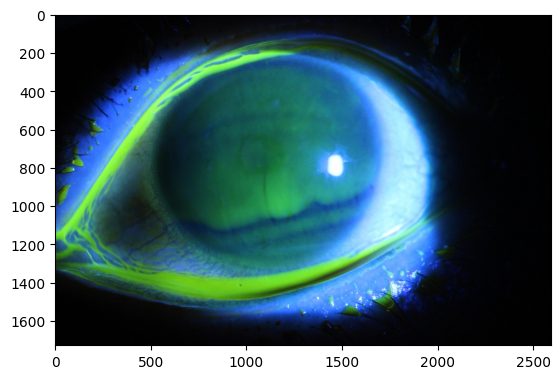

In [17]:
eye_image = cv2.imread(os.path.join(raw_image_data_path, "63.jpg"))
eye_image_rgb = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)
plt.imshow(eye_image_rgb)

Así es como se ve la imagen en su estado original, pero se puede ver que es más información de la que necesitamos para poder hacer la detección de las úlceras.


Lo primero será reducir solo el rango de interés que es la córnea, usando la máscara donde se puede extraer

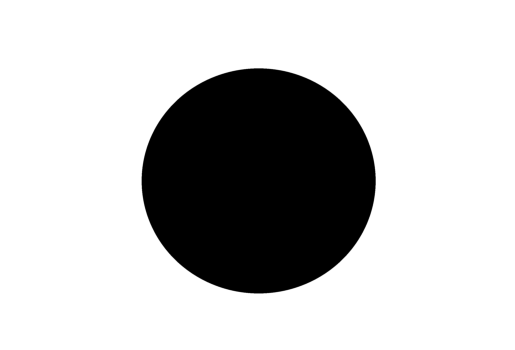

In [21]:
cornea_path = os.path.join(corneaLabels_path, "63.png")
cornea_label = cv2.imread(cornea_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(cornea_label, cmap='gray')
plt.axis('off')
plt.show()

Aqui se muestra la máscara que ayudará a la extracción

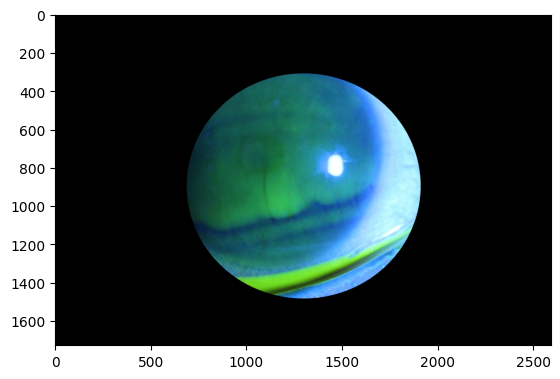

In [24]:
inverted_mask = cv2.bitwise_not(cornea_label)

extracted_cornea = cv2.bitwise_and(eye_image, eye_image, mask=inverted_mask)

extracted_cornea = cv2.cvtColor(extracted_cornea, cv2.COLOR_BGR2RGB)
plt.imshow(extracted_cornea)

Ya con la estracción del área de interés.

Como se puede ver debido a la luz en el momento que se tomó la foto se tiene que hacer una limpieza del brillo.

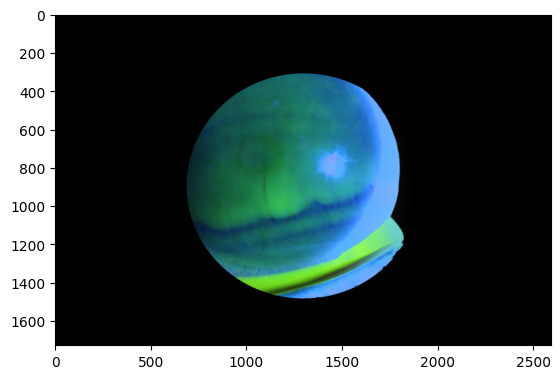

In [33]:
gray_cornea_image = cv2.cvtColor(extracted_cornea, cv2.COLOR_BGR2GRAY)

_, bright_areas_mask = cv2.threshold(
    gray_cornea_image,
    190,
    255,
    cv2.THRESH_BINARY,
)

smoothed_cornea = cv2.inpaint(
    extracted_cornea,
    bright_areas_mask,
    inpaintRadius=5,
    flags=cv2.INPAINT_TELEA,
)

# smoothed_cornea = cv2.cvtColor(smoothed_cornea, cv2.COLOR_BGR2RGB)
plt.imshow(smoothed_cornea)

De esta forma ya se logra difuminar la parte brillosa para que no interfiera en los resultados

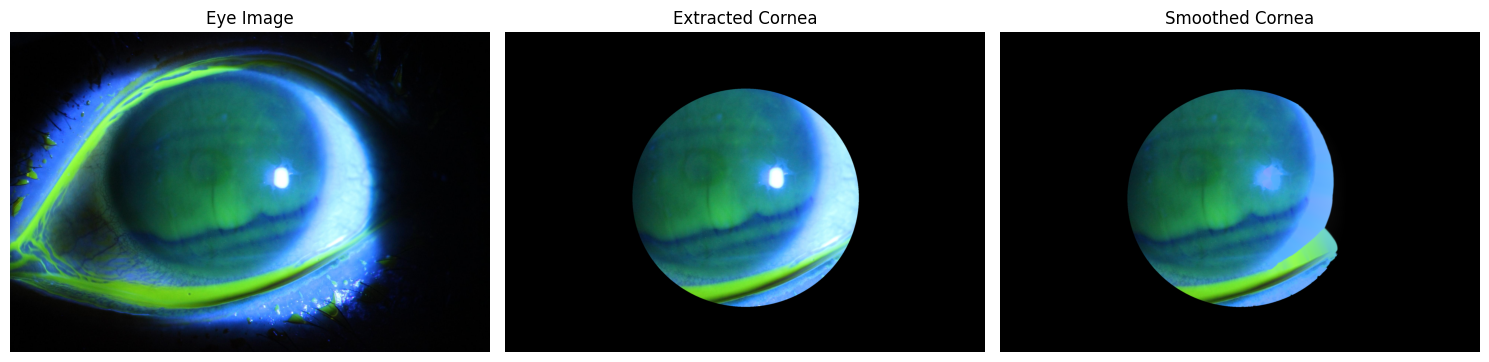

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(eye_image_rgb)
axes[0].axis('off')
axes[0].set_title("Eye Image")
axes[1].imshow(extracted_cornea)
axes[1].axis('off')
axes[1].set_title("Extracted Cornea")
axes[2].imshow(smoothed_cornea)
axes[2].axis('off')
axes[2].set_title("Smoothed Cornea")

# Mostrar las imágenes
plt.tight_layout()
plt.show()

# Funcionamiento de la clase para el proceso de todos los datos

In [2]:
from preprocessing_data import PreprocessRawImages

In [9]:
raw_image_data_path = os.path.join(os.getcwd(), '../data/rawImages')
corneaLabels_path = os.path.join(os.getcwd(), '../data/corneaLabels')
destination_path = os.path.join("./preprocessed_images")

In [36]:
extraction_corneal_class = PreprocessRawImages(
    raw_image_data_path=raw_image_data_path,
    cornea_label_data_path=corneaLabels_path,
    destination_path=destination_path)

extraction_corneal_class.process_eyes()

Saved extracted cornea to ./preprocessed_images/63.jpg
Saved extracted cornea to ./preprocessed_images/189.jpg
Saved extracted cornea to ./preprocessed_images/77.jpg
Saved extracted cornea to ./preprocessed_images/638.jpg
Saved extracted cornea to ./preprocessed_images/604.jpg
Saved extracted cornea to ./preprocessed_images/162.jpg
Saved extracted cornea to ./preprocessed_images/176.jpg
Saved extracted cornea to ./preprocessed_images/88.jpg
Saved extracted cornea to ./preprocessed_images/610.jpg
Saved extracted cornea to ./preprocessed_images/348.jpg
Saved extracted cornea to ./preprocessed_images/360.jpg
Saved extracted cornea to ./preprocessed_images/406.jpg
Saved extracted cornea to ./preprocessed_images/412.jpg
Saved extracted cornea to ./preprocessed_images/374.jpg
Saved extracted cornea to ./preprocessed_images/599.jpg
Saved extracted cornea to ./preprocessed_images/228.jpg
Saved extracted cornea to ./preprocessed_images/214.jpg
Saved extracted cornea to ./preprocessed_images/572

# Conclusión

En este proyecto, desarrollamos una función que optimiza el procesamiento de imágenes de ojos a lo largo de todo el flujo de trabajo. Mediante técnicas avanzadas de procesamiento de imágenes y el uso de una máscara de píxeles, logramos extraer únicamente el área corneal de la imagen original.

Dado el brillo generado por la luz y la propia reflexión de la córnea al capturar la imagen, se implementó una función adicional para corregir este problema. Esta función reduce el brillo y suaviza las áreas afectadas, mejorando la calidad de las imágenes procesadas.

Finalmente, los resultados se guardan en una carpeta donde todas las imágenes se procesan de forma automatizada. Esta solución no solo agiliza el análisis de datos, sino que también ofrece una función escalable, capaz de manejar grandes volúmenes de imágenes de manera eficiente.